# Hesaplamalı Tarifler I: Newton ve Benzeri Metodlar

[İlker Birbil](http://people.sabanciuniv.edu/sibirbil/) / sibirbil@sabanciuniv.edu / [www.bolbilim.com](www.bolbilim.com)

(__Bu yazının Matematik Dünyası'nda basıldığı haline [buradan](MD_SIB_Haziran16_Baski.pdf) erişebilirsiniz.__)


Princeton Üniversitesi Yayınları'ndan 2015 yılında bir kitap çıktı [1]. Kapsamlı bir uygulamalı matematik ansiklopedisi. Tahmin edeceğiniz üzere, tuğla gibi bir kitap. Ansiklopedinin editörlerinden birisi olan Nicholas J. Higham, geçenlerde bir yazı yayımladı [2]. Yazısında, ansiklopedide geçen ve kitabın sonundaki dizine göre en çok referans gösterilen 10 algoritmayı sıralamış.  Ne yalan söyleyeyim çok keyiflendim. Çünkü o listedekilerin en azından yarısını derslerimde anlattığımı farkettim. Bir yazı konusu düşünürken, 10 konuyu kucağımda buldum. Şansa bak! 

Lafı uzatmadan listenin başındaki Newton ve Newton-benzeri yöntemler ile yazı dizisine başlayalım.

Matematikle ilgili bir konuyu anlatmanın yemek tarifi vermeye benzer
bir yanı var. Her iki durumda da sizi dinleyen kişinin temel bir
bilgisi olduğunu varsayabilirsiniz. Kabartma tozu nedir, türev nasıl
alınır, seriler yakınsar mı, soğan kavrulur mu gibi noktalarda biraz
fikri olmalı. Ancak tarif karışıksa, malzemeleri önceden tanıtmak ve
daha iyi bilinen benzer yemeklerden örnekler vermek isabetli
olur. Hele ona da kollarını sıvatıp, birlikte yapmaya davet
ederseniz bir daha kolay kolay unutmaz.


Bu sayıdaki konuyu anlatmak için iki malzeme yeterli gelecek. İlkinde
bir fonksiyonu yaklaşık olarak hesaplamanın yollarından birinden
bahsedeceğim. İkincisinde ise çok boyutlu uzayda fonksiyonlara ve
döngülü algoritmalara hızlı bir giriş yapmamız gerekecek.

**Taylor Polinomları**

Diyelim ki elimizde $f$ ile gösterdiğimiz bir fonksiyon var. Bu
fonksiyonun $a$ noktasında istediğimiz kadar türevini alabiliyor
olalım.  Şimdi bu fonksiyonu, $a$ noktası çevresine kuracağım birinci
dereceden bir polinom ile yaklaşık olarak bulmaya çalışayım. O zaman

$$
p_1(x) = c_0 + c_1(x-a)
$$

şeklinde yazmalıyız. Bir kere polinom $x=a$ değerinde $f(a)$ değerini
vermeli. Bu durumda $c_0=f(a)$ olmak zorunda. Dolayısıyla
$p_1(a)=f(a)$ oldu. Güzel. Fakat eğimi veren $c_1$ değeri ne olacak
belli değil. Tıpkı sabit kısımda yaptığımız gibi, eğimlerin de
tutmasını bekleyebiliriz. Bunun için asıl fonksiyonun türevi ile
polinomun türevi $a$ noktasında birbirlerine eşit olmalılar. Yani söz
konusu birinci türev şartımız şu şekilde yazılacak:

$$
p'_1(a) = f'(a).
$$

Bu şartı sağlamanın tek yolu eğimin $c_1=f'(a)$ olarak
belirlenmesi. Birinci dereceden Taylor polinomumuz artık hazır

$$
p_1(x) = f(a) + f'(a)(x-a).
$$

Birinci derece çok basit kaçtı. İkinci derece Taylor polinomuna
geçelim. Elimizde 

$$
p_2(x) = p_1(x) + c_2(x-a)^2
$$

şeklinde bir ifade olmalı. Aynı numarayı bir daha deneyebiliriz. Bu
sefer ikinci türevlere bakalım. Amacımız

$$
p''_2(a) = f''(a)
$$

eşitliğini sağlayacak $c_2$ katsayısını bulmak. Hemen deneyelim

$$
p''_2(x) = p''_1(x) + 2c_2 = 2c_2.
$$

O zaman $c_2=f''(a)/2$ olmak zorunda. İkinci dereceden polinomumuzu da
artık şu şekilde yazabiliriz:

$$
p_2(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2}(x-a)^2. \hspace{15mm} \mbox{(1)}
$$

Sadece birkaç basit adım attık ama istediğimizi elde ettik. Bir göz atalım

$$
\begin{array}{c}
p_2(a) = f(a),\\
p'_2(a) = f'(a),\\
p''_2(a) = f''(a).
\end{array}
$$

Bu adımları aynı şekilde uygulayıp $p_3, p_4, \dots$ gibi farklı
derecelerdeki Taylor polinomlarını elde edebiliriz. Biz genel
formunu düşünelim: 

$$
p_n(x) = \sum^n_{t=0}c_t (x-a)^t. 
$$

Fonksiyonların farklı derecelerden türevlerini köşeli parentez içinde
yazdığımız sayılar ile ifade edersek, türevler ile ilgili istediğimiz
eşitlikleri her bir $t=0, \dots, n$ için

$$
p^{[t]}_n(a) =  t!c_t = f^{[t]}(a)
$$

şeklinde yazabiliriz. Burada $f^{[0]}(a) \triangleq f(a)$ gösterimini
düşünüyoruz tabii. Evet sonunda polinomların katsayılarını elde ettik

$$
c_t = \frac{f^{[t]}(a)}{t!}.
$$

Karşınızda Taylor polinomları:

$$
p_n(x) = \sum^n_{t=0} \frac{f^{[t]}(a)}{t!}(x-a)^t. 
$$

İyi ter döktük. Bakalım bu polinomlar nasıl çalışıyorlar. Örnek
fonksiyonumuz $f(x)=e^x$ olsun. Bu fonksiyonun tüm türevleri kendisine
eşit. Eğer $a=0$ noktasında incelersek, her bir $t=0, \dots, n$ için

$$$
f^{[t]}(0) = e^0 = 1
$$

eşitliğini elde ediyoruz. O zaman Taylor polinomları da oldukça
kolaylaşıyor:

$$
p_n(x) = \sum^n_{t=0} \frac{x^t}{t!}. 
$$

Aşağıdaki şekilde ilk dört polinomu görebilirsiniz. Hiç fena
değil. Dikkat ederseniz $a=0$ noktasından çok uzaklaşmazsak,
polinomlarımız $f$ fonksiyonuna oldukça yakınlar. Aklımızda olsun.

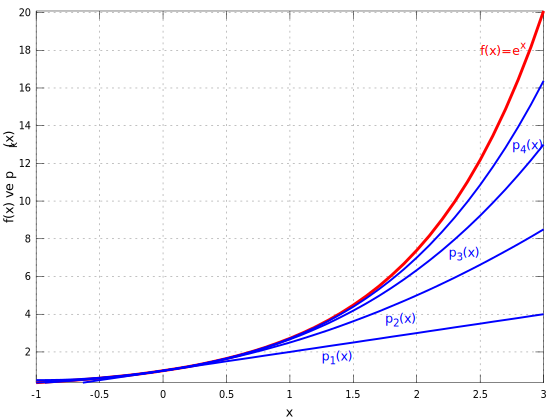

In [2]:
x = -1.0:0.1:3.0;
plot(x, exp(x), 'r-', 'LineWidth', 3);
axis('tight'); grid on; hold on;
xlabel('x'); h = get(gca,'xlabel');
set(h,'FontSize',13);
ylabel('f(x) ve p_k(x)'); h = get(gca,'ylabel');
set(h,'FontSize',13)
for n=1:4
    px = zeros(1, length(x));
    for k=0:n
        px = px + (x.^k)/factorial(k);
    end
    plot(x, px, 'b--', 'LineWidth', 2);
end
text(1.25, 1.8, 'p_1(x)', 'Color', 'b', 'FontSize', 13);
text(1.75, 3.8, 'p_2(x)', 'Color', 'b', 'FontSize', 13);
text(2.25, 7.3, 'p_3(x)', 'Color', 'b', 'FontSize', 13);
text(2.75, 13, 'p_4(x)', 'Color', 'b', 'FontSize', 13);
text(2.50, 18, 'f(x)=e^x', 'Color', 'r', 'FontSize', 13);

$\newcommand{\tr}{^{\intercal}} \newcommand{\inv}{^{-1}}$

Bahsettiğimiz polinomları kullanarak, Taylor serilerinden bahsetmek
mümkün. Fakat benim bu yazıda serilere ihtiyacım olmayacak. Onun için
geçiyorum. Ama bu kadar emek verdiniz, herhangi bir analiz kitabından
okumanızı salık veririm. Eğer okursanız şöyle bir eşitlik
göreceksiniz:

$$
f(x) = \sum^\infty_{t=0} \frac{f^{[t]}(a)}{t!}(x-a)^t. 
$$

Yazının kalan kısmında en fazla ikinci dereceden Taylor polinomları
ile ilgileneceğiz. O durum içinse şunu yazabiliyoruz:

$$
f(x) = p_1(x) + \mathcal{O}(|x-a|^2) = p_2(x) + \mathcal{O}(|x-a|^3).
$$

Bu eşitliklerdeki $\mathcal{O}$ simgesi ile gösterilen işleç, $x$
noktası $a$ noktasına yaklaşırken, sondaki terimin iki nokta
arasındaki mesafenin karesi ya da küpü hızıyla sıfıra gittiğini
söylüyor. Diğer bir deyişle, eğer $a$ noktasına iyice yakınsak, elde
ettiğimiz polinom $f$ fonksiyonunu çok iyi kestiriyor. Tam da
yukardaki şekilde gördüğümüz gibi.

**Çok Boyutlu Uzay ve Algoritmalar**

Önce kullanacağım birkaç simgeyi tanıtayım. Yazacaklarım çok daha
farklı kümelerde ifade edilebilir ama ben $\mathbb{R}^n$ simgesi ile
gösterilen $n$ boyutlu gerçek sayılar uzayında çalışacağım. Bu
uzaydaki her bir noktayı $n$ bileşenden oluşan bir sütun vektörü
olarak kullanacağım ve $x \in \mathbb{R}^n$ vektörünün boyunu $\|x\|$
ile göstereceğim.

Vektörlerle çalışan ve bir gerçek sayı döndüren fonksiyonlar
$f: \mathbb{R}^n \mapsto \mathbb{R}$ şeklinde gösterilir. Bu
fonksiyonların $k$. türevi için $\nabla^k f$ sembolü kullanılır ve
birinci türevi elde etmek için $n$ boyutun her birine göre kısmi türev
alınırak aşağıdaki vektör elde edilir:

$$
\nabla f(x) = \left[\begin{array}{c}
\frac{\partial f(x)}{\partial x_1} \\
\frac{\partial f(x)}{\partial x_2} \\
\vdots \\
\frac{\partial f(x)}{\partial x_n}
\end{array}\right].
$$

İkinci türevleri ise bir matris verecektir:

$$
\nabla^2 f(x) = \left[\begin{array}{cccc}
\frac{\partial^2 f(x)}{\partial x^2_1} & \frac{\partial^2 f(x)}{\partial
                                       x_1\partial x_2} & \dots & \frac{\partial^2 f(x)}{\partial
                                       x_1\partial x_n}\\
\frac{\partial^2 f(x)}{\partial x_2\partial x_1} & \frac{\partial^2
                                                 f(x)}{\partial x^2_2}
                                                        & \dots &
                                                                  \frac{\partial^2 f(x)}{\partial 
                                       x_2\partial x_n} \\
\vdots & \vdots & \vdots & \vdots \\
\frac{\partial^2 f(x)}{\partial x_n\partial x_1} & \frac{\partial^2
                                                 f(x)}{\partial
                                                   x_n \partial x_2}
                                                        & \dots &
                                                                  \frac{\partial^2
                                                                  f(x)}{\partial
                                                                  x^2_n}
\end{array}\right].
$$

Görüldüğü üzere $\nabla f: \mathbb{R}^n \mapsto \mathbb{R}^n$ ve
$\nabla^2 f: \mathbb{R}^n \mapsto \mathbb{R}^{n\times n}$
fonksiyonlarını elde ediyoruz. Şimdi bu türevleri kullanarak Taylor
polinomlarını yazabiliriz. Mesela $f(x)$ fonksiyonunu $a$ vektörü
_yakınlarında_ ikinci dereceden Taylor polinomu ile yaklaşık
olarak hesaplayalım:

$$
f(x) \approx f(a) + \overset{f'(a)(x-a)}{\overbrace{\nabla f(a)\tr
    (x-a)}} + 
 \underset{\frac{f''(a)}{2}(x-a)^2}{\underbrace{\tfrac{1}{2}(x-a)\tr
    \nabla^2f(a)(x-a)}}.
$$

Daha önce bahsettiğimiz ikinci dereceden polinom (1) ile
karşılaştırmanız için ilgili ifadeleri terimlerin üstüne ya da altına
yazdım. Ayrıca söylemeden geçmeyeyim; $n\times m$ boyutlu bir $A$
matrisinin $m\times n$ boyutlu devriğini $A\tr$ ile gösteriyoruz. Her
vektör aslında bir matris olduğu için sütun vektörleri satır, satır
vektörleri de sütun vektörleri oluyorlar.

Bir de vektör değişkenlerle çalışan ve vektör döndüren
$F: \mathbb{R}^n \mapsto \mathbb{R}^m$ fonksiyonuna bakalım. Kendisini
şu şekilde gösterecek olursak

$$
F(x) = \left[
  \begin{array}{c}
    f_1(x) \\
    f_2(x) \\
    \vdots \\
    f_m(x) \\
  \end{array}
\right],
$$

birinci türevi $m \times n$ boyutlarında bir matris olur:

$$
\nabla F(x) = \left[
  \begin{array}{c}
\nabla f_1(x)\tr \\
\nabla f_2(x)\tr \\
\vdots \\
\nabla f_m(x)\tr
  \end{array}
\right].
$$

Bazı kitaplarda bu matrise _Jacobi_ denir. 



Gerek birazdan bahsedeceğimiz Newton metodları, gerekse eniyileme
(optimizasyon) metodlarının tamamına yakını bir _döngülü
  algoritma_ olarak yazılabilir. Böyle bir algoritmada $k$ adımı
hesaplanır ve elde edilen sonuca göre $k+1$ adımına geçilir. Diyelim
ki $k$ adımında $x^{(k)}$ vektörü ile gösterilen $n$ boyutlu uzayın
bir noktasındayız. Bir sonraki noktaya gitmek için $p^{(k)}$ diye bir
yön vektörü bulunur ve o yönde boyu $\alpha_k$ sayısı ile belirlenen
bir adım atılır. Yani

$$
x^{(k+1)} = x^{(k)} + \alpha_k p^{(k)}.
$$

Bu durumda $p^{(k)}$ vektörünü ve $\alpha_k$ adım boyunu bulmak temel
hedeflerdir. Artık kullandığımız simgeleri biraz kolaylaştırsak iyi
olacak:

$$
f_k \triangleq f(x^{(k)}), ~ \nabla f_k \triangleq \nabla f(x^{(k)}), ~ \nabla^2 f_k \triangleq
\nabla^2 f(x^{(k)}).
$$

Son olarak $\alpha_k=1$ alıp, ikinci derece Taylor polinomununda $x$
yerine $x^{(k)} + p$ yazacak olursak $f$ fonksiyonuna şu şekilde
yaklaşabiliriz:

$$
f(x^{(k)} + p) \approx f_k + \nabla f_k \tr p + \tfrac{1}{2}p\tr \nabla^2f_k p. \hspace{15mm} \mbox{(2)}
$$

Önceki gözlemlerimi de düşününce, aklıma şu fikir geliyor: Eğer bir
sonraki adımımızda fazla uzaklara gitmezsek, yani $\|p\|$ çok büyük
değilse, $f$ yerine ikinci dereceden bir polinom ile
çalışabilirim. Bu fikri ilerde kullanacağım.


## 2. Newton Metodu

Sonunda asıl konumuza gelebildik. Newton metodunun amacı $m$ tane
eşitlikten oluşan bir sisteme çözüm olacak $n$ boyutlu bir $x$ vektörü
bulmak. Her $i=1, \dots, m$ için $f_i:\mathbb{R}^n \mapsto \mathbb{R}$
fonksiyonlarını tanımlarsak, Newton metodunu

$$
\left[
  \begin{array}{c}
f_1(x) \\
f_2(x) \\
\vdots \\
f_m(x)
  \end{array}
\right] = \left[
  \begin{array}{c}
0 \\
0 \\
\vdots \\
0
  \end{array}
\right] 
$$

ile verilen sistemi sağlayacak bir $x \in \mathbb{R}^n$ bulmak için
kullanabiliriz. Hani lisede kök bulma diye öğrendiğimiz şey. Önceden
tanıttığımız simgeleri kullanmanın tam zamanı. Bu sistemi yazmak için
$F:\mathbb{R}^n \mapsto \mathbb{R}^m$ fonksiyonu daha uygun. Kısaca
çözümünü aradığımız sistem şöyle:

$$
F(x) = 0.
$$

Bu eşitliğin sağ tarafında $m$ boyutlu sıfır vektörü var. Açıkçası,
böyle bir sistemin tüm köklerinin bulmak çok zor olabilir. Çünkü
sistemin satırları oldukça karmaşık, doğrusal olmayan fonksiyonlar
içerebilirler. Onun için köklerden bir tanesini bulmak hedefimiz
olsun.

Newton metodunun numarası, karmaşık $F$ fonksiyonu yerine ona yaklaşık
birinci dereceden Taylor polinomlarını kullanmak ve bu işlemi adım
adım yaparak döngülü bir algoritma elde etmek. Algoritmanın $k$
iterasyonunda  $x^{(k)}$ noktasında olduğumuzu varsayalım. O zaman

$$
F(x^{(k)} + p) \approx F(x^{(k)}) + \nabla F(x^{(k)}) p
$$

şeklinde yazabiliriz. Simgeleri önceki gibi basitleştirelim

$$
F_k \triangleq F(x^{(k)}), ~ \nabla F_k \triangleq \nabla F(x^{(k)}).
$$

Şimdi asıl fonksiyon yerine, birinci dereceden polinomu sıfır
vektörüne eşitleyelim:

$$
F_k + \nabla F_k p = 0 \implies  \nabla F_k p = -F_k.
$$

Dikkat ederseniz $F_k$ sabit bir vektör. O zaman elimizde bilinmeyeni
$p$ olan doğrusal bir denklem sistemi var. Lineer cebir ne güne
duruyor? Çözelim sistemi, bulalım $p$ vektörünü. Eğer o çözüme
$p^{(k)}$ dersek, $x^{(k+1)} = x^{(k)} + p^{(k)}$ ile bir sonraki
noktaya ulaşırız. Oradan $x^{(k+2)}, x^{(k+3)}, \dots$ diye
devam ederiz. Zaten bunu da yaptık mı Newton metodunun algoritmasını
yazmaya hazırız demektir.

---
**NEWTON METODU**
1. Başlangıç $x^{(0)}$ vektörünü seç.
2. İterasyonları başlat; $k = 0$.
3. $\|F_k\| \approx 0$ olana kadar şu adımları tekrarla:
    1. Aşağıdaki lineer sistemi $p$ için çöz:

    $$
    \nabla F_k p = -F_k.
    $$
    
    Çözümü $p^{(k)}$'ya ata.
    2. Yeni noktayı hesapla: 
    
    $$
    x^{(k+1)} = x^{(k)} + p^{(k)}.
    $$
    
    3. İterasyonu bir arttır; $k \leftarrow k+1$.
---

Hadi bir örnek yapalım. Önce çözeceğimiz sistemi yazalım:

$$
F(x) = \left[\begin{array}{c}
x_1^2x_2^3 + x_1x_2 - 2\\[2mm]
2x_1x_2^2 + x_1^2x_2 + x_1x_2
\end{array}\right] = 0.
$$

Malum türeve ihtiyaç olacak. O kolay,

$$
\nabla F(x) = \left[\begin{array}{cc}
2x_1x_2^3 + x_2 & 3x_1^2x_2^2 + x_1 \\
2x_2^2 + 2x_1x_2 + x_2 & 4x_1x_2 + x_1^2 + x_1
\end{array}\right].
$$

Aşağıdaki grafikte $x^{(0)}=(1, -1)\tr$ noktasından başlattığımız algoritmanın çözümünü görebilirsiniz. Altı iterasyonda köklerden birini bulmuşuz ($\|F_6\| \approx 0$).

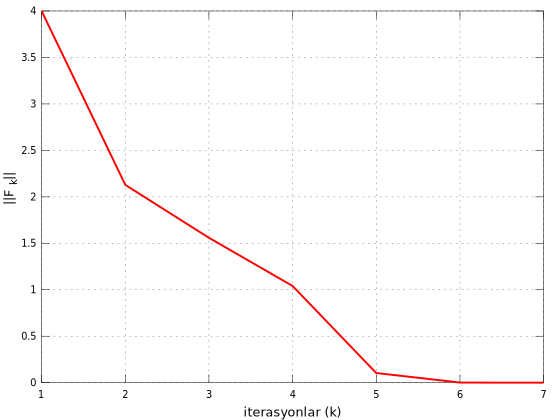

In [3]:
F = @(x)[x(1)^2*x(2)^3 + x(1)*x(2) - 2; ...
             2*x(1)*x(2)^2 + x(1)^2*x(2) + x(1)*x(2)];
TF = @(x)[2*x(1)*x(2)^3 + x(2),  3*x(1)^2*x(2)^2 + x(1); ... 
              2*x(2)^2 + 2*x(1)*x(2) + x(2), 4*x(1)*x(2) + x(1)^2 + x(1)];
x0 = [1; -1];
maxiter = 100;
nFxv = zeros(1, maxiter);
iter = 1; x = x0;
nFx = norm(F(x));
nFxv(iter) = nFx; 
while (nFx > 1.0e-6 && iter <= maxiter)
    p = -TF(x)\F(x);
    x = x + p;
    nFx = norm(F(x));
    iter = iter + 1;
    nFxv(iter) = nFx;
end
plot(1:iter, nFxv(1:iter), 'r-', 'LineWidth', 2);
axis('tight'); grid on;
xlabel('iterasyonlar (k)'); h = get(gca,'xlabel');
set(h,'FontSize',13);
ylabel('||F_k||'); h = get(gca,'ylabel');
set(h,'FontSize',13);

Çözümün bulunma hızı etkileyici değil mi?  Ancak bu kadar toz pembe
bir tablo çizmem doğru olmaz. Çünkü bu kadar hızlı bir çözümü garanti
etmek için birkaç varsayım gerekli. Bunların arasında türev matrisinin
çözüm noktasındaki yapısı, başlangıç noktasının çözüme yakın olması
gibi şartlar var [3].


O sulara dalmak yerine gelin biz Newton metodu ile eniyilemenin ilgisini kuralım. Bir kısıtsız eniyileme modelini şu şekilde ifade edebiliriz:

$$
 \min\{f(x) ~|~ x \in \mathbb{R}^n\}. \hspace{15mm} \mbox{(3)}
$$

Burada $f:\mathbb{R}^n \mapsto \mathbb{R}$ en küçük değerini bulmak istediğimiz amaç fonksiyonunu gösteriyor. Bu fonksiyonun en az iki kere türevlenebildiğini varsayacağım. Bu modelde bilinmeyen $x$ vektörünün istediğimiz gibi seçebiliyoruz. Onun için bu modele kısıtsız diyoruz. Kısıtlı problemler ile ilgili de anlatmak istediğim
çok şey var. Fakat onları sonraki yazılara bırakayım.

Aslında kısıtsız eniyileme probleminin en küçük değerini (minimum) verecek çözüm noktasıyla ilgili kesin bir fikrimiz var. Tıpkı lisede ya da üniversitenin ilk yıllarında öğrendiğiniz gibi, o noktada amaç fonksiyonunun türevi sıfır olacak. Varsayalım $x^*$ vektörü, bu problemin çözümü olsun. O zaman şu eşitliği yazabiliriz:

$$
\nabla f(x^*) = 0. \hspace{15mm} \mbox{(4)}
$$

Elimizde $n$ bilinmeyenli, $n$ tane eşitlik var. Newton metodu için biçilmiş kaftan. Tek yapmamız gereken daha önce $F$ dediğimiz fonksiyon yerine $\nabla f$ ve $\nabla F$ yerine $\nabla^2 f$ yazmak. O durumda Newton algoritmasında çözeceğimiz lineer denklem sistemi

$$
\nabla^2 f_kp = -\nabla f_k \hspace{15mm} \mbox{(5)}
$$

haline geliyor. Burada $\nabla^2 f_k$ bir kare matris. Eğer bu matrisin tersi varsa, $p^{(k)}$ doğrudan hesaplanabilir:

$$
p^{(k)} = -(\nabla^2 f_k)\inv \nabla f_k.
$$

Bu şekilde hesaplanan $p^{(k)}$ vektörüne eniyileme dünyasında _Newton yönü_ denir.

Newton algoritması ile eniyileme arasındaki ilişkiyi açıklarken doğrudan (4) ile gösterilen denklem sistemini
kullandık. Bir diğer yol ise (3) ile verilen modelin amaç fonksiyonuna ikinci dereceden bir Taylor polinomu ile yaklaşmak. Daha önce konuştuğumuz gibi $x^{(k)}$ noktasının yakınlarında amaç fonksiyonuna (2) ile verildiği gibi
yaklaşabiliyoruz. Yaklaşık fonksiyon için yeni bir simge tanımlayalım:

$$
m_k(p) \triangleq f_k + \nabla f_k \tr p + p\tr \nabla^2 f_k p.
$$

Şimdi kısıtsız enyileme problemimiz (3) yerine, $p$ değişkeni üzerinden ifade edilen aşağıdaki yaklaşık modeli çözmeyi düşünebiliriz:

$$
\min\{m_k(p) ~|~ p \in \mathbb{R}^n\}. \hspace{15mm} \mbox{(6)}
$$

Bu modelin amaç fonksiyonunun türevini alıp sıfıra eşitlediğimizde

$$
\nabla m_k(p) = 0 \implies \nabla^2 f_kp = -\nabla f_k.
$$

Bu yolla da (5) ile aynı lineer sistemi elde ettik.

Özetle türevi sıfıra eşitleyecek denklemi Newton metodu ile çözüyoruz diyebiliriz. Fakat bu denklem sistemini sağlayan pek çok vektör olabilir. En fenası, amaç fonksiyonunun en büyük değerini (maksimum) veren nokta bile bu sistemi sağlar. Bütün çözüm vektörlerini bulursak, her birini amaç fonksiyonuna koyarak en küçük değeri verenini seçebiliriz. Ancak denklem sistemlerinde bahsettiğimiz gibi pek çok problem için bütün çözümleri bulmak son derece güç.

İyisi mi bu problemi çözmek için biraz daha akıllı bir algoritma tasarlamaya koyulalım. Hedefimiz $x^{(k)}$ adımından $x^{(k+1)}$ adımına geçerken amaç fonksiyonunu düşürmek olsun. Bunun için hem bir yön $p^{(k)}$, hem de bir adım boyu $\alpha_k$ hesaplamamız gerekecek. Simgelerimizi kullanırsak

$$
f(x^{(k+1)}) = f(x^{(k)} + \alpha_k p^{(k)}) = f_{k+1} \leq f_k
$$

eşitsizliğinin peşindeyiz. Böyle bir ilerlemeyi doğrudan $f$ üzerinde yapmak çok iddialı olacak. Onun yerine bir kez daha Taylor polinomlarını kullanalım. Birinci dereceyi yazdım bile:

$$
f(x^{(k)} + \alpha p) \approx f_k +
    \alpha\underset{< 0}{\underbrace{\nabla f_k \tr p}} < f_k.
$$

Eğer $\nabla f_k \tr p$ teriminin negatif olmasını garanti edersem, soldaki yaklaşık değer $f_k$ değerinden daha düşük olacak. Bu şekilde $\nabla f_k \tr p < 0$ eşitsizliğini sağlayan $p$ vektörüne _iniş yönü_ deniyor.

Ayrıca Taylor polinomları konusundan biliyorum ki, eğer $\alpha$ _yeterince_ küçülürse, $x^{(k)}$ ile $x^{(k+1)}$ birbirlerine yaklaşırlar. O zaman da $f$ fonksiyonuna çok yakınsarım ve asıl amaç fonksiyonunun değerinde de istediğim düşmeyi elde ederim. Anlaşılan iki tane ödevim var: 

1. $p^{(k)}$ vektörünün iniş yönü olmasını sağlamak.
2. Amaç fonksiyonunu düşürecek bir $\alpha_k$ (adım boyu) belirlemek.

İlk ödev için Newton yönünü deneyelim. O durumda $p^{(k)} = -(\nabla^2f_k)\inv \nabla f_k$ almalıyım,

$$
\nabla f_k \tr p^{(k)} = -\nabla f_k \tr (\nabla^2f_k)\inv \nabla f_k
\overset{?}{<} 0.
$$

Fakat bu değerin her adımda negatif olması garanti değil. Biraz can sıkıcı. Eğer Newton yönü olmazsa $p^{(k)} = -\nabla f_k$ alabilirim. O zaman da 

$$
\nabla f_k \tr p^{(k)} = -\nabla f_k \tr \nabla f_k = -\|\nabla f_k\|^2 < 0 \hspace{15mm} \mbox{(7)}
$$

şeklinde istediğimi elde ederim. Dikkat ederseniz $\|\nabla f_k\|^2 = 0$ durumunu göz ardı ediyorum. Çünkü o durumda
$\nabla f(x) = 0$ sistemini çözen bir nokta (bu durumda $x^{(k)}$) bulduk demektir; ki o zaman da algoritmayı durdurabilirim. Bu arada (7) ile hesaplanan $p^{(k)}$ vektörünün de bir ismi var: _en dik iniş yönü_.

Diyebilirsiniz ki "O zaman Newton yönüne ne gerek var? Hep en dik iniş yönünü kullanalım." Hatırlarsanız denklem sistemlerinde Newton metodu ile çözüme çok hızlı ulaşıyorduk. Aynı gözlem kısıtsız eniyileme için de geçerli. Newton yönünü kullanabilirsek iterasyon sayımızı ciddi oranda azaltabiliriz. Benzer bir performansı, en dik iniş yönü ile maalesef yakalayamıyoruz. Bu noktayla ilgili bir örneği az sonra vereceğim ama ikinci ödevimizi unutmayalım. Neyse ki bu daha kolay. Yapmamız gereken $\beta \in (0,1)$ değeri için, şu şartı sağlayan adım boyunu ($\alpha_k$) bulmak:

$$
f(x^{(k)} + \alpha p) \leq f_k + \beta \alpha \nabla f_k \tr p.
$$

Bu eşitsizliğe _Armijo şartı_ deniyor. Türkçesi: Birinci dereceden Taylor polinomu için kaydettiğin azalmanın en azından bir kısmını, asıl amaç fonksiyonu $f$ için de garanti et. Adım boyunu belirlemek için farklı algoritmalar var. Bunların en kolayı, adım boyunu Armijo şartı sağlanana kadar küçültmek. Ortaya çıkan algoritmanın ismi de _geriye dönüşlü arama_.

---
**GERİYE DÖNÜŞLÜ ARAMA**
1. Başlangıç adım boyunu seç; $\alpha = 1$.
2. Küçültme parametresini seç; $\rho \in (0, 1)$.
3. Armijo şartı sağlanana kadar aşağıdaki adımı tekrarla:

  $$
  \alpha \leftarrow \rho \alpha
  $$ 
  
4. En son değeri kaydet; $\alpha_k = \alpha$.
---

Newton yönü kullanıldığında, genellikle $\beta = 10^{-4}$ ve $\rho = 0,9$ olarak alınır. Evet, her iki ödevimizi de tamamladık. O zaman örneğimize geçmeden önce eniyileme algoritmamızı yazabiliriz.

---
**NEWTON METODUYLA ENİYİLEME**
1. Başlangıç $x^{(0)}$ vektörünü seç.
2. İterasyonları başlat; $k = 0$.
3. $\|\nabla f_k\| \approx 0$ olana kadar şu adımları tekrar et:
    1. $p^{(k)} = -(\nabla^2 f_k)\inv \nabla f_k$ hesapla
    2. Eğer $\nabla f_k\tr p^{(k)} \geq 0$ ise $p^{(k)} = -\nabla f_k$.
    3. **Geriye Dönüşlü Arama** ile $\alpha_k$ değerini bul.
    4. Yeni noktayı hesapla: 
    
    $$
    x^{(k+1)} = x^{(k)} + \alpha_k p^{(k)}.
    $$
    
    5. İterasyonu bir arttır; $k \leftarrow k+1$.
---

Örneğimize geçelim. Amaç fonksiyonumuz 

$$
f(x) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2
$$

olarak verilsin. Bu fonksiyon eniyileme camiasında o kadar çok kullanılıyor ki kendi ismi var: _Rosenbrock fonksiyonu_.

1. metodun iterasyon sayisi yetmedi.


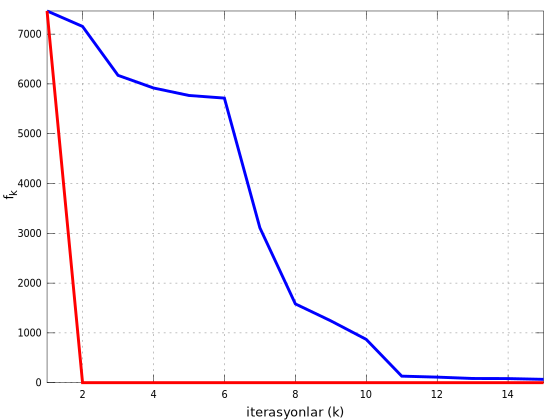

In [22]:
f = @(x)100*(x(2) - x(1)^2)^2 + (1 - x(1))^2;
df = @(x)[-400*x(1)*(x(2) - x(1)^2) - 2*(1 - x(1)); ...
    200*(x(2) - x(1)^2)];
d2f = @(x)[800*x(1)^2 - 400*(x(2) - x(1)^2) + 2, -400*x(1); ...
    -400*x(1), 200];
metodlar = [1, 2];
% 1: En dik inis yonu
% 2: Newton yonu
x0 = [0.8; -8];
maxiter = 200;
maxgditer = 200;
beta = 1.0e-4;
rho = 0.9;
for metod=metodlar
    fxv = zeros(1, maxiter);
    iter = 1;
    xk = x0;
    fxv(iter) = f(xk);
    dfval = df(xk);
    while (norm(dfval) > 1.0e-2 && iter <= maxiter)      
        if metod==1
            pk = -dfval;
        elseif metod==2
            pk = -d2f(xk)\dfval;
            if (pk'*dfval >= 0)
                pk = -dfval;
            end
        end
        alfa = 1.0;
        gditer = 1;
        while (f(xk+alfa*pk) > f(xk) + alfa*beta*dfval'*pk && gditer <= maxgditer)
            alfa = rho*alfa;
            gditer = gditer + 1;
        end
        if gditer > maxgditer
            fprintf('Geriye donus algoritmasi (%d. metod) iterasyon sinirini asti.\n', metod);
        end
        xk = xk + alfa*pk;
        dfval = df(xk);
        iter = iter + 1;
        fxv(iter) = f(xk);
    end
    if iter > maxiter
        fprintf('%d. metodun iterasyon sayisi yetmedi.\n', metod);
    end
    xlen = 15;
    if metod==1
        plot(1:xlen, fxv(1:xlen), 'b--', 'LineWidth', 3);
        hold on;
    elseif metod==2
        plot(1:xlen, fxv(1:xlen), 'r-', 'LineWidth', 3);
        hold on;
    end
end
axis('tight'); grid on;
xlabel('iterasyonlar (k)');
h = get(gca,'xlabel');
set(h,'FontSize',13);
ylabel('f_k');
h = get(gca,'ylabel');
set(h,'FontSize',13);

Bu grafikteki kırmız çizgi az önce yazdığımız Newton yönünü kullanan eniyileme algoritmasını, mavi çizgi ise sadece en dik iniş yönünü kullanan bir algoritmayı gösteriyor (3. adımda $p^{(k)}$ her zaman $-\nabla f_k$ alınıyor). Newton yönünü kullanınca amaç fonksiyonu değerinin ne kadar hızlı düştüğüne bakar mısınız. İşte tam da bu yüzden Newton yönünü kullanmaya çok gerek var.

## 3. Newton-benzeri Metodlar

Newton metodu harika sonuçlar veriyor. Orası doğru. Ancak biraz masraflı. Bir kere hesaplama yükü fazla. Çünkü her adımda ikinci dereceden bir türev ($\nabla^2 f_k$) hesaplamak gerekiyor. O da yetmiyor; bir de bu matrisin tersini ($\nabla^2 f_k\inv$) almak zorunda kalıyoruz. Hadi onu da almaya razı olduk diyelim. Bakalım tersi var mı? Tersi olsa bile bulduğumuz Newton yönünün, elimizdeki fonksiyonu azaltan bir iniş yönü olması garanti değil.

Enseyi karartmayalım. Derdimize deva olacak bir çözüm var: _Newton-benzeri metodlar_ (_quasi-Newton methods_). Bu metodlar sayesinde ikinci türevi almadan, Newton yönüne benzer bir yön bulabiliyoruz. Üstelik herhangi bir adımda matrisin tersini kolayca elde ediyoruz. Bu metodların tek zayıf tarafı, Newton yönünü tam hesaplamadıkları için çözüm bulma hızları Newton metodları kadar iyi değil. Ancak en dik iniş yönüne göre çok daha başarılılar.

Newton-benzeri metodlarla hesaplayacağımız yönü 

$$
p^{(k)} = -B_k\inv\nabla f_k
$$

şeklinde yazalım. Burada $n \times n$ boyutlu $B_k$ matrisi, ikinci türev matrisinin $x^{(k)}$ noktasındaki rolüne soyunuyor. Şimdi bir şekilde $B_{k+1}$ matrisini bulacağız. Newton metodunu anlatırken (6) ile verilen yaklaşık modeli yazmıştık. O zaman $B_{k+1}$ matrisini kullanarak 

$$
\hat{m}_k(p) = f_{k+1} + \nabla f_{k+1} \tr p + p\tr B_{k+1} p.
$$

şeklinde yeni bir yaklaşık amaç fonksiyonu yazalım. Şimdi de bu fonksiyonu kullanarak çözeceğimiz eniyileme modelini elde edelim:

$$
\min\{\hat{m}_k(p) ~|~ p \in \mathbb{R}^n\}
$$

Bakalım bu iterasyonda elimizde neler var: bir önceki konumumuz $x^{(k)}$, katettiğimiz yol $\alpha_k p^{(k)}$, $x^{(k)}$ noktasındaki geçmiş türev bilgisi $\nabla f_k$ ve yeni konumumuz $x^{(k+1)} = x^{(k)} + \alpha_kp^{(k)}$. Ayrıca ek bir hesap ile yeni konumumuzdaki türev bilgisini $\nabla f_{k+1}$ de hesaplayabiliriz. 

Bir kere yaklaşık amaç fonksiyonunun yeni konumdaki türevi, asıl fonksiyonun türevi ile tutuyor. Yani

$$
\nabla \hat{m}_k(0) = \nabla f_{k+1}.
$$

Peki ya bir önceki iterasyondaki türev ile tutuyor mu? Tutması için

$$
\nabla \hat{m}_k(-\alpha_kp^{(k)}) = \nabla f_{k}
$$

olması gerekir. Biraz açarsak

$$
\nabla \hat{m}_k(-\alpha_kp^{(k)}) = \nabla f_{k+1} -
\alpha_kB_{k+1}p^{(k)} = \nabla f_k.
$$

Ya da

$$
B_{k+1}(\alpha_kp^{(k)}) = \nabla f_{k+1} - \nabla f_k.
$$

Bu eşitliği iki yeni simge,

$$
\begin{array}{c}
s_k \triangleq x^{(k+1)} - x^{(k)}, \\
y_k \triangleq  \nabla f_{k+1} - \nabla f_{k}, \\
\end{array}
$$

tanımlayarak sadeleştirebiliriz:

$$
B_{k+1}s_k = y_k.
$$

Elde ettiğimiz eşitliğe _sekant denklemi_ deniliyor. 

Sekant denklemini sağlayan sonsuz sayıda $B_{k+1}$ matrisi bulunabilir. Ancak hatırlarsanız bizim ayrıca kendi şartlarımız da var:

1. $B_{k+1}$ matrisinin tersi ($B\inv_{k+1}$) tanımlı olmalı. 
2. $B\inv_{k+1}$ kolay hesaplanmalı. 
3. $p^{(k+1)}$ iniş yönü olmalı ($p^{(k+1)}\nabla f_{k+1} < 0$).

Neyse ki bütün bu şartları sağlayan ve uygulamalarda son derece başarılı olan bir Newton-benzeri yöntem var. Bu yönteme göre matris şu şekilde hesaplanıyor:

$$
B_{k+1} = B_k - \frac{B_ks_ks_k\tr B_k}{s_k\tr B_ks_k} +
\frac{y_ky_k\tr}{y_k\tr s_k}.
$$

Matrisin sekant denklemini sağladığını yerine koyarak kolayca kontrol edebilirsiniz. Önerilen matrisin tersi ise lineer cebirdeki Sherman-Woodburry-Morrison özdeşliği ile kolayca bulunabiliyor:

$$
B\inv_{k+1} = \left(I - \frac{s_ky_k\tr}{s_k\tr
    y_k}\right)B\inv_{k}\left(I - \frac{s_ky_k\tr}{s_k\tr y_k}\right)
+ \frac{s_ks_k\tr}{s_k\tr y_k}. \hspace{15mm} \mbox{(8)}
$$

Burada $I$ simgesi $n \times n$ boyutlarındaki birim matris olarak kullanılıyor. Dikkat ederseniz yeni matrisin tersini bulmak için bir önceki matrisin tersini ($B\inv_{k}$) kullandık. Eğer algoritmaya başladığımızda $B_0 = I$ olarak seçersek, iterasyonlar boyunca gerek $B_k$ matrislerini, gerekse onların terslerini bulmak bu formüllerle
çok kolay olacak. Dahası var. Şayet herhangi bir $d \in \mathbb{R}^n$, $\|d\| \neq 0$ vektörü için

$$
d\tr B\inv_{k}d > 0
$$

ve $s_k\tr y_k > 0$ olduğu biliniyorsa,

$$
d\tr B\inv_{k+1}d > 0
$$

eşitsizliği de sağlanıyor. Yani $B_0=I$ şeklinde başlarsak ve $s_k\tr y_k > 0$ olursa, tüm iterasyonlarda bu eşitsizlikler tutuyorlar. Dolayısıyla 

$$
\nabla f_k\tr (-B\inv_{k+1}\nabla f_k) = -\nabla f_k\tr
B\inv_{k+1}\nabla f_k < 0
$$

hesabı sayesinde $p^{(k+1)}$ vektörünün iniş yönü olduğunu görüyoruz. Üç şartımız da sağlandı. Matrisin bu şekilde hesaplanması ile elde edilen Newton-benzeri yönteme _BFGS metodu_ deniyor. Kısaltmanın bir anlamı yok; sadece metodu bulan araştırmacıların soyadlarının ilk harflerinden oluşuyor (**B**royden, **F**letcher, **G**oldfarb,
**S**hanno) [3].

Unutmadan ufak bir noktayı daha aradan çıkaralım. Kullanılan formüllerin paydalarında $s_k\tr y_k$ değeri kullanılıyor. Bölmenin sorun çıkarmaması için bu değer sıfıra çok yaklaşırsa, $B_{k+1}=I$ alınarak devam ediliyor. Diğer bir deyişle o iterasyonda en dik iniş yönü seçiliyor. Şimdi algoritmamızı derli toplu yazabiliriz. Aşağıdaki
algoritmada $\varepsilon$ ile çok küçük bir sayıyı ($\approx 10^{-8}$) ifade ediyoruz.

---
**BFGS İLE ENİYİLEME**
1. Başlangıç $x^{(0)}$ vektörünü seç.
2. İlk matrisi seç; $B_0 = B\inv_0 = I$.
3. İterasyonları başlat; $k = 0$.
4. $\|\nabla f_k\| \approx 0$ olana kadar şu adımları tekrar et:
    1. $p^{(k)} = -(B\inv_k)\nabla f_k$ hesapla.
    2. **Geriye Dönüşlü Arama** ile $\alpha_k$ değerini bul.
    3. Yeni noktayı hesapla: 

    $$
    x^{(k+1)} = x^{(k)} + \alpha_k p^{(k)}.
    $$

    4. Eğer $s_k\tr y_k < \varepsilon$ ise $B\inv_{k+1} = I$ olarak ata. Aksi halde $B\inv_{k+1}$ matrisini (8) formülü ile hesapla.
    5. İterasyonu bir arttır; $k \leftarrow k+1$.
---

Son olarak Rosenbrock fonksiyonunu bir de yeni metodumuzla çözelim. Aşağıdaki grafikte yeşil çizgi BFGS algoritması ile elde ettiğimiz sonucu gösteriyor. Tamam, Newton algoritması (kırmızı çizgi) kadar iyi değil ama en dik iniş yönünü (mavi çizgi) kullanmaya göre çok daha parlak bir performansı var.

1. metodun iterasyon sayisi yetmedi.


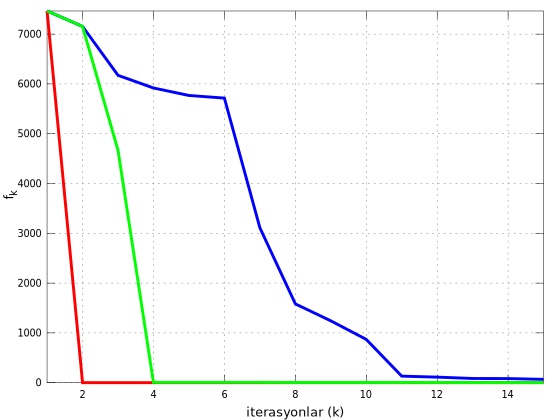

In [21]:
f = @(x)100*(x(2) - x(1)^2)^2 + (1 - x(1))^2;
df = @(x)[-400*x(1)*(x(2) - x(1)^2) - 2*(1 - x(1)); ...
    200*(x(2) - x(1)^2)];
d2f = @(x)[800*x(1)^2 - 400*(x(2) - x(1)^2) + 2, -400*x(1); ...
    -400*x(1), 200];
metodlar = [1, 2, 3];
% 1: En dik inis yonu
% 2: Newton yonu
% 3: BFGS yonu
x0 = [0.8; -8];
maxiter = 200;
maxgditer = 200;
beta = 1.0e-4;
rho = 0.9; I = eye(2); Bkt = I;
for metod=metodlar
    fxv = zeros(1, maxiter);
    iter = 1;
    xk = x0;
    fxv(iter) = f(xk);
    dfval = df(xk);
    while (norm(dfval) > 1.0e-2 && iter <= maxiter)
        if metod==1
            pk = -dfval;
        elseif metod==2
            pk = -d2f(xk)\dfval;
            if (pk'*dfval >= 0)
                pk = -dfval;
            end
        elseif metod==3
            pk = -Bkt*dfval;
        end
        alfa = 1.0;
        gditer = 1;
        while (f(xk+alfa*pk) > f(xk) + alfa*beta*dfval'*pk && gditer <= maxgditer)
            alfa = rho*alfa;
            gditer = gditer + 1;
        end
        if gditer > maxgditer
            fprintf('Geriye donus algoritmasi (%d. metod) iterasyon sinirini asti.\n', metod);
        end
        if metod == 3
            yk = dfval;
        end
        xk = xk + alfa*pk;
        dfval = df(xk);
        iter = iter + 1;
        fxv(iter) = f(xk);
        if metod==3
            sk = alfa*pk;
            yk = dfval - yk;
            payda = yk'*sk;
            if (payda < 1.0e-8)
                Bkt = I;
            else
                Bkt = (I - (sk*yk')/(payda))*Bkt*(I - (yk*sk')/(payda)) + (sk*sk')/(payda);
            end
        end
    end
    if iter > maxiter
        fprintf('%d. metodun iterasyon sayisi yetmedi.\n', metod);
    end
    xlen = 15;
    if metod==1
        plot(1:xlen, fxv(1:xlen), 'b--', 'LineWidth', 3);
        hold on;
    elseif metod==2
        plot(1:xlen, fxv(1:xlen), 'r-', 'LineWidth', 3);
        hold on;
    elseif metod==3
        plot(1:xlen, fxv(1:xlen), 'g:', 'LineWidth', 3);
        hold on;
    end
end
axis('tight'); grid on;
xlabel('iterasyonlar (k)');
h = get(gca,'xlabel');
set(h,'FontSize',13);
ylabel('f_k');
h = get(gca,'ylabel');
set(h,'FontSize',13);

## 4. Kolları Sıvayın

En başta yazmıştım. Yeni bir hesaplamalı tarif öğrendiyseniz, pekişmesi için sizin de tarifi denemeniz gerekir. 

Programlama için açık kaynak kodlu [GNU Octave](https://www.gnu.org/software/octave/) kullandım. Bu programı ücretsiz olarak bilgisayarınıza yükleyebilirsiniz [4]. Yok eğer yüklemeden deneyeyim derseniz, herhangi bir tarayıcı ile kullanabileceğiniz şöyle bir sayfa var: [http://octave-online.net](http://octave-online.net).

Benden bu kadar. Önümüzdeki yazıda konumuz matrisleri çarpanlarına ayırma olacak. Oldukça kolay bir tarif. Siz de o zamana kadar GNU Octave kullanmaya alışırsanız harika olur.


---

### Kaynakça

[1] Nicholas J. Higham, Mark R. Dennis, Paul Glendinning, Paul A. Martin, Fadil Santosa ve Jared Tanner (editörler), The Princeton Companion to Applied Mathematics, Princeton University Press, Princeton, NJ, ABD, 2015.

[2] [http://tinyurl.com/MD0616-SIB-1](http://tinyurl.com/MD0616-SIB-1)

[3] Jorge Nocedal ve Stephen J. Wright, Numerical Optimization, Springer (2. baskı), New York, NY, ABD, 2006.

[4] [https://www.gnu.org/software/octave/](https://www.gnu.org/software/octave/)
